# Classification

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
url = './exam_data.csv'
df = pd.read_csv(url, index_col=0, names=['Index', 'Sex','Length', 'Diameter', 'Height', \
    'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

target = 'Rings'

print("The Data Frame has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.head()

The Data Frame has 4177 rows and 9 columns


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,,
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


We can see that the column 'Sex' must be transform in numerical values, and that we have some null values. Let's deal with those.

In [58]:
from sklearn.preprocessing import OneHotEncoder

df0 = df.copy()
transformed_col = 'Sex'
one = OneHotEncoder()

enc = one.fit_transform(df[[transformed_col]]).toarray()
enc_df = pd.DataFrame(data=enc, columns= one.categories_[0])

df0 = df0.join(enc_df)
print("The data frame has now {} rows and {} columns".format(df0.shape[0], df0.shape[1]))
df0.head()

The data frame has now 4177 rows and 12 columns


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Index,,,,,,,,,,,,
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0,0.0,0.0,1.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0,0.0,0.0,1.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0


Now, we can drop the column 'Sex'

In [59]:
df = df0.copy()
df = df.drop(columns='Sex')

print("The data frame has now {} rows and {} columns".format(df.shape[0], df.shape[1]))

df.head()

The data frame has now 4177 rows and 11 columns


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Index,,,,,,,,,,,
0,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0,0.0,0.0,1.0
1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0,0.0,0.0,1.0
2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0


In [60]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623,0.312904,0.321283,0.365813
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000,1.000000,1.000000,1.000000


Dealing with NaN values

In [61]:
print("The data frame has {} null rows".format(df.shape[0] - df.dropna().shape[0]))

df = df.dropna()

print("Now, after the preprocessing, the data frame has {} null rows".format(df.shape[0] - df.dropna().shape[0]))
df.head()


The data frame has 1125 null rows
Now, after the preprocessing, the data frame has 0 null rows


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Index,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2.0,0.0,0.0,1.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0,0.0,1.0,0.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,3.0,1.0,0.0,0.0


In [62]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
count,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000
mean,0.528711,0.412182,0.141348,0.848453,0.365107,0.184521,0.245766,0.937418,0.314220,0.307995,0.377785
std,0.118448,0.098055,0.042892,0.491105,0.220724,0.109367,0.140534,0.785197,0.464281,0.461740,0.484913
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,0.000000
25%,0.460000,0.355000,0.115000,0.466750,0.195500,0.099000,0.137875,0.000000,0.000000,0.000000,0.000000
50%,0.550000,0.425000,0.145000,0.817250,0.342000,0.174000,0.240000,1.000000,0.000000,0.000000,0.000000
75%,0.620000,0.485000,0.170000,1.176125,0.506625,0.257000,0.335000,1.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.641500,0.897000,3.000000,1.000000,1.000000,1.000000


Showing data distribution after the preprocessing

/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

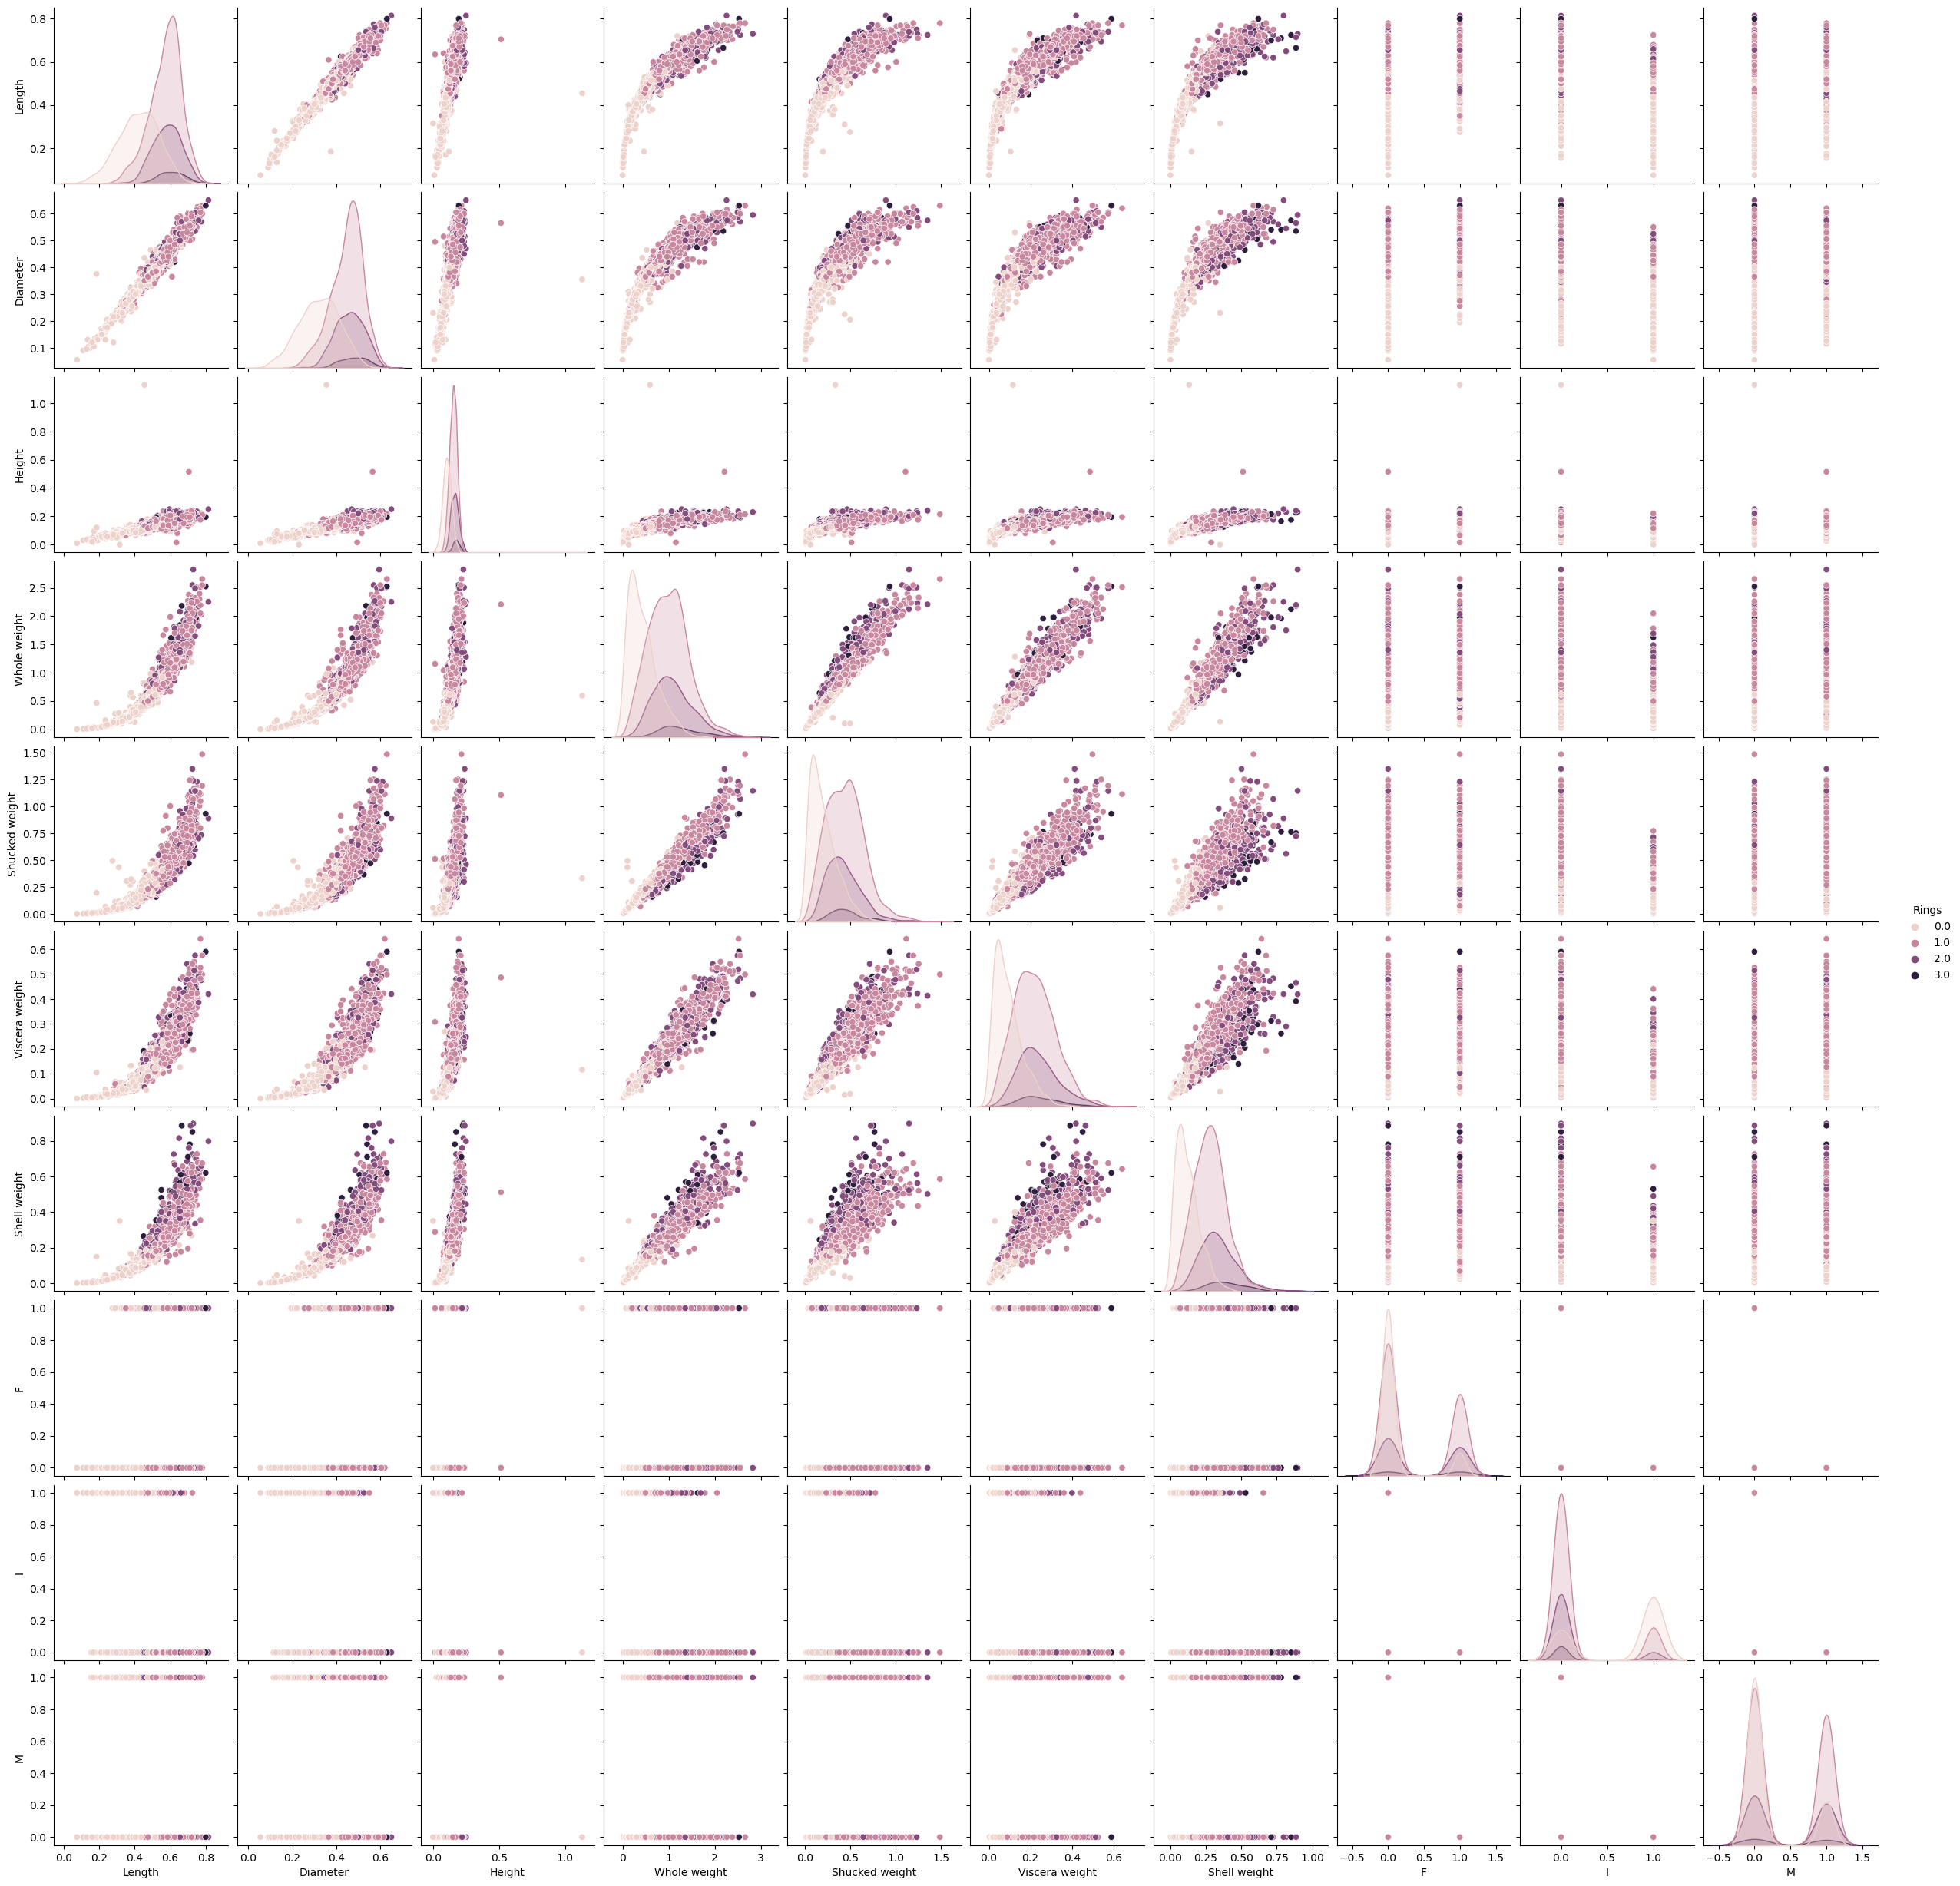

In [63]:
sns.pairplot(df, hue=target)

<Axes: >

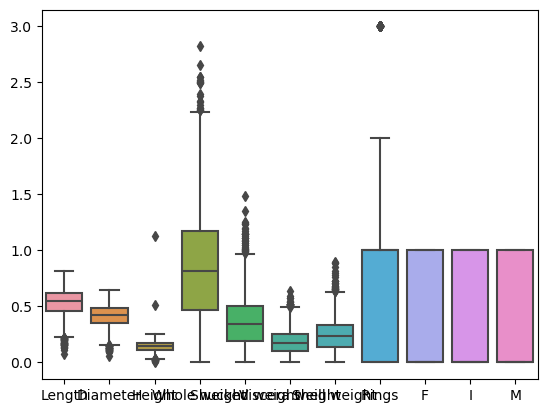

In [64]:
sns.boxplot(df)

So, even though we have transformed our values, we still have some outliers.
We can drop some columns that show the same data distribution, such as: lenght, whole weight, shucked weight, viscera weight -> they have a distribution similar to $y=x$

/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

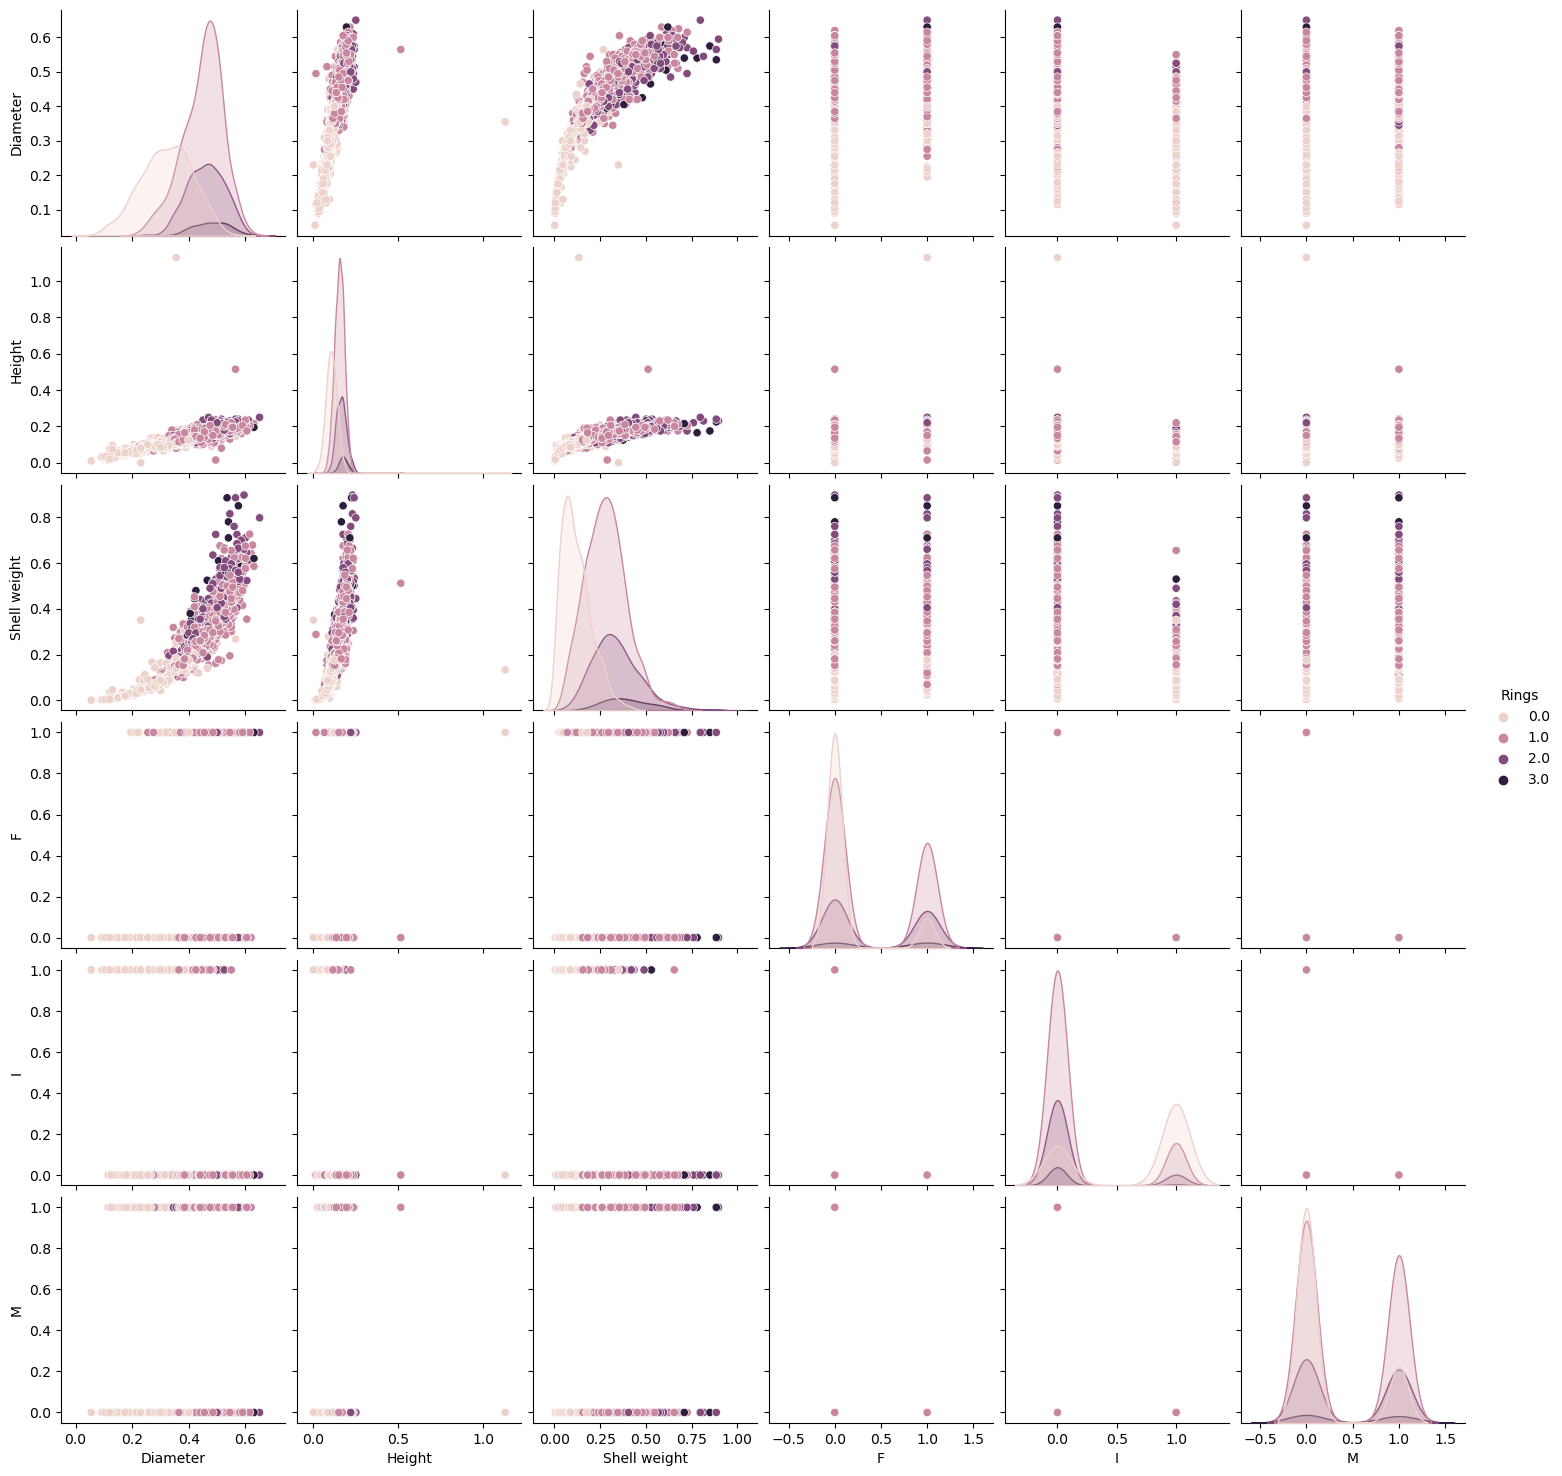

In [65]:
df1 = df.drop(columns=['Length', 'Whole weight', 'Viscera weight', 'Shucked weight'])
df = df1.copy()
sns.pairplot(df, hue=target)

# Second Step
find the best classification scheme considering two classification methods: use cross validation and find best hyperparameters. Optimization must be focused on the f1_macro measure.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
score = 'f1_macro'

models_lbls = ['dt', 'knn']

param_dt = [{'max_depth': list(range(1,20))}]
param_knn = [{'n_neighbors': list(range(1,11))}]

models = {
   'dt': {
        'name': 'Decision Tree Classifier',
        'params': param_dt,
        'estimator': DecisionTreeClassifier()
    },
    'knn': {
        'name': 'K Neighbors Classifier',
        'params': param_knn,
        'estimator': KNeighborsClassifier()
    }
}



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

models_scores = []
estimators = {}

for m in models_lbls:
    clf = GridSearchCV(estimator=models[m]['estimator'], param_grid=models[m]['params'],
                       scoring=score, cv=5, n_jobs=2)
    y_pred = clf.fit(X_train, y_train)
    estimators[m] = clf.best_estimator_
    models_scores.append([m, clf.best_score_, clf.best_params_])
    
result_df = pd.DataFrame(data=models_scores, columns=['Model', 'Best Score - f1 score', 'Best Params'])
result_df.sort_values(by='Best Score - f1 score', ascending=False)
result_df.head()

,Model,Best Score - f1 score,Best Params
0,dt,0.443831,{'max_depth': 7}
1,knn,0.454247,{'n_neighbors': 7}
